<a href="https://colab.research.google.com/github/m-lokeshnaik/classification-of-covid-varients-based-on-protein-sequences/blob/main/un_encoding_protein_sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
# !pip install catboost
# !pip install xgboost
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install sklearn
# !pip install seaborn
# !pip install scipy
# !pip install openpyxl
# !pip install BaggingClassifier
# !pip install DecisionTreeClassifier
# !pip install GradientBoostingClassifier
# !pip install RandomForestClassifier
# !pip install SelectKBest
# !pip install mutual_info_classif
# !pip install f_classif
# !pip install chi2

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


#data loading


In [122]:
# Load the Excel files
df = pd.read_excel(r"/content/protein sequence for normal.xlsx")

In [123]:
df.isnull().sum()

,0
Alanine(A),0
Arginine (R),0
Asparagine(N),0
Aspartic acid(D),0
Cysteine (C),0
Glutamine(Q),0
Glutamic acid(E),0
Glycine(G),0
Histidine(H),0
Isoleucine(I),0


In [124]:
df.head()

,Alanine(A),Arginine (R),Asparagine(N),Aspartic acid(D),Cysteine (C),Glutamine(Q),Glutamic acid(E),Glycine(G),Histidine(H),Isoleucine(I),...,Leucine(K),Methionine(M),Phenylalanine(F),Proline(P),Serine(S),Threonine(T),Tryptophan(W),Tyrosine(Y),Valine(V),class labels
0,24,27,25,24,2,28,19,34,10,14,...,28,4,23,32,52,27,5,16,19,HCoV-HKU1
1,10,8,11,7,3,5,3,11,2,21,...,12,8,21,7,16,18,6,10,19,HCoV-HKU1
2,9,10,32,21,15,6,5,19,9,28,...,18,2,39,17,42,10,4,33,24,HCoV-HKU1
3,24,27,25,24,2,28,19,34,10,14,...,28,4,23,32,52,27,5,16,19,HCoV-HKU1
4,10,8,11,7,3,5,3,11,2,21,...,12,8,21,7,16,18,6,10,19,HCoV-HKU1


In [125]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame
scaler = MinMaxScaler()

# Select numerical columns (excluding 'class labels')
numerical_cols = df.columns[:-1]

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df)

     Alanine(A)  Arginine (R)  Asparagine(N)  Aspartic acid(D)  Cysteine (C)  \
0        0.2875      0.254902       0.261364          0.366667         0.050   
1        0.1125      0.068627       0.102273          0.083333         0.075   
2        0.1000      0.088235       0.340909          0.316667         0.375   
3        0.2875      0.254902       0.261364          0.366667         0.050   
4        0.1125      0.068627       0.102273          0.083333         0.075   
..          ...           ...            ...               ...           ...   
795      0.4500      0.215686       0.170455          0.400000         0.075   
796      0.3125      0.303922       0.511364          0.400000         0.375   
797      0.6000      0.343137       0.056818          0.350000         0.275   
798      0.1375      0.107843       0.068182          0.383333         0.025   
799      0.2250      0.235294       0.215909          0.316667         0.175   

     Glutamine(Q)  Glutamic acid(E)  Gl

In [126]:
# Separate features and labels
X = df.drop(columns=['class labels'])
y = df['class labels']
print(X)
print(y)

     Alanine(A)  Arginine (R)  Asparagine(N)  Aspartic acid(D)  Cysteine (C)  \
0        0.2875      0.254902       0.261364          0.366667         0.050   
1        0.1125      0.068627       0.102273          0.083333         0.075   
2        0.1000      0.088235       0.340909          0.316667         0.375   
3        0.2875      0.254902       0.261364          0.366667         0.050   
4        0.1125      0.068627       0.102273          0.083333         0.075   
..          ...           ...            ...               ...           ...   
795      0.4500      0.215686       0.170455          0.400000         0.075   
796      0.3125      0.303922       0.511364          0.400000         0.375   
797      0.6000      0.343137       0.056818          0.350000         0.275   
798      0.1375      0.107843       0.068182          0.383333         0.025   
799      0.2250      0.235294       0.215909          0.316667         0.175   

     Glutamine(Q)  Glutamic acid(E)  Gl

In [127]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [128]:
# Apply feature selection methods
def select_features(X, y, method, k=10):
    if method == 'IG':
        selector = SelectKBest(score_func=mutual_info_classif, k=k)
    elif method == 'ANOVA':
        selector = SelectKBest(score_func=f_classif, k=k)
    elif method == 'Chi2':
        X = X.apply(np.int64)  # Chi2 requires non-negative values
        selector = SelectKBest(score_func=chi2, k=k)
    elif method == 'MI':
        # Mutual Information
        selector = SelectKBest(score_func=mutual_info_classif, k=k)
    else:
        raise ValueError("Unknown method: {}".format(method))

    X_new = selector.fit_transform(X, y)
    selected_features = selector.get_support(indices=True)
    feature_names = X.columns[selected_features]
    return X_new, selected_features, feature_names, selector


In [129]:
# Select top 10 features using each method
X_ig, selected_features_ig, feature_names_ig, _ = select_features(X, y, method='IG', k=10)
X_anova, selected_features_anova, feature_names_anova, _ = select_features(X, y, method='ANOVA', k=10)
X_chi2, selected_features_chi2, feature_names_chi2, _ = select_features(X, y, method='Chi2', k=10)
X_mi, selected_features_mi, feature_names_mi, _ = select_features(X, y, method='MI', k=10)

In [130]:

# Define classifiers
classifiers = {
    'BE': BaggingClassifier(),
    'DT': DecisionTreeClassifier(),
    'GB': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'RF': RandomForestClassifier(),
    'SVM': SVC(),
    "catboost": CatBoostClassifier(),
    "xgboost": XGBClassifier()
}

In [131]:
# Function to evaluate classifiers
def evaluate_classifiers(X, y, classifiers):
    results = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)

        # Handle multiclass confusion matrix
        specificity = []
        for i in range(cm.shape[0]):
            tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
            fp = np.sum(cm[:, i]) - cm[i, i]
            specificity.append(tn / (tn + fp) if (tn + fp) != 0 else 0)  # Handle potential division by zero

        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Sensitivity': recall,
            'Specificity': np.mean(specificity)  # Report average specificity
        }

    return results

In [132]:
# Evaluate classifiers using features selected by Information Gain
results_ig = evaluate_classifiers(X_ig, y, classifiers)
# Evaluate classifiers using features selected by ANOVA
results_anova = evaluate_classifiers(X_anova, y, classifiers)
# Evaluate classifiers using features selected by Chi2
results_chi2 = evaluate_classifiers(X_chi2, y, classifiers)
# Evaluate classifiers using features selected by Mutual Information
results_mi = evaluate_classifiers(X_mi, y, classifiers)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.077346
0:	learn: 1.8051849	total: 7.44ms	remaining: 7.43s
1:	learn: 1.6182747	total: 11.1ms	remaining: 5.56s
2:	learn: 1.4581883	total: 14.6ms	remaining: 4.86s
3:	learn: 1.3240662	total: 18.1ms	remaining: 4.5s
4:	learn: 1.2186150	total: 21.6ms	remaining: 4.29s
5:	learn: 1.1270259	total: 25.1ms	remaining: 4.16s
6:	learn: 1.0368915	total: 28.8ms	remaining: 4.08s
7:	learn: 0.9654889	total: 32.5ms	remaining: 4.03s
8:	learn: 0.8959488	total: 36ms	remaining: 3.97s
9:	learn: 0.8389279	total: 39.5ms	remaining: 3.91s
10:	learn: 0.7855355	total: 42.9ms	remaining: 3.86s
11:	learn: 0.7394159	total: 46.5ms	remaining: 3.83s
12:	learn: 0.6973244	total: 50ms	remaining: 3.8s
13:	learn: 0.6577532	total: 53.5ms	remaining: 3.77s
14:	learn: 0.6251614	total: 56.8ms	remaining: 3.73s
15:	learn: 0.5894198	total: 60.2ms	remaining: 3.7s
16:	learn: 0.5619757	total: 63.8ms	remaining: 3.69s
17:	learn: 0.5366046	total: 67ms	remaining: 3.65s
18:	learn: 0.5077202	total: 70.6ms	remaining: 3.64s
1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.077346
0:	learn: 1.8184605	total: 11.1ms	remaining: 11.1s
1:	learn: 1.6188381	total: 18.8ms	remaining: 9.39s
2:	learn: 1.4816859	total: 26.4ms	remaining: 8.77s
3:	learn: 1.3574147	total: 31.2ms	remaining: 7.76s
4:	learn: 1.2470341	total: 36.1ms	remaining: 7.18s
5:	learn: 1.1578425	total: 40.8ms	remaining: 6.75s
6:	learn: 1.0657742	total: 45.3ms	remaining: 6.43s
7:	learn: 0.9976515	total: 48.4ms	remaining: 6s
8:	learn: 0.9305782	total: 55.5ms	remaining: 6.11s
9:	learn: 0.8707680	total: 60.2ms	remaining: 5.96s
10:	learn: 0.8191238	total: 64.5ms	remaining: 5.8s
11:	learn: 0.7704027	total: 68.8ms	remaining: 5.66s
12:	learn: 0.7223767	total: 73ms	remaining: 5.54s
13:	learn: 0.6855770	total: 77.5ms	remaining: 5.46s
14:	learn: 0.6502793	total: 81.6ms	remaining: 5.36s
15:	learn: 0.6177208	total: 85.5ms	remaining: 5.26s
16:	learn: 0.5986112	total: 89.9ms	remaining: 5.2s
17:	learn: 0.5754428	total: 93ms	remaining: 5.07s
18:	learn: 0.5483066	total: 98.1ms	remaining: 5.06s
1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning

Learning rate set to 0.077346
0:	learn: 1.9459628	total: 2.49ms	remaining: 2.48s
1:	learn: 1.8479074	total: 3.81ms	remaining: 1.9s
2:	learn: 1.7620653	total: 5.74ms	remaining: 1.91s
3:	learn: 1.6900929	total: 7.5ms	remaining: 1.87s
4:	learn: 1.6245092	total: 13.1ms	remaining: 2.6s
5:	learn: 1.5688392	total: 15.2ms	remaining: 2.52s
6:	learn: 1.5217179	total: 17.2ms	remaining: 2.44s
7:	learn: 1.4762836	total: 22ms	remaining: 2.72s
8:	learn: 1.4368569	total: 26.7ms	remaining: 2.94s
9:	learn: 1.4038973	total: 28.5ms	remaining: 2.82s
10:	learn: 1.3743980	total: 30.3ms	remaining: 2.72s
11:	learn: 1.3447755	total: 33ms	remaining: 2.72s
12:	learn: 1.3188275	total: 37.7ms	remaining: 2.86s
13:	learn: 1.2956594	total: 40.3ms	remaining: 2.84s
14:	learn: 1.2737849	total: 45ms	remaining: 2.95s
15:	learn: 1.2546033	total: 49.6ms	remaining: 3.05s
16:	learn: 1.2375762	total: 54.3ms	remaining: 3.14s
17:	learn: 1.2308483	total: 56ms	remaining: 3.05s
18:	learn: 1.2158260	total: 60.5ms	remaining: 3.13s
19:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.077346
0:	learn: 1.8051849	total: 8.27ms	remaining: 8.26s
1:	learn: 1.6182747	total: 16.8ms	remaining: 8.4s
2:	learn: 1.4581883	total: 25.4ms	remaining: 8.44s
3:	learn: 1.3240662	total: 34ms	remaining: 8.47s
4:	learn: 1.2186150	total: 42.5ms	remaining: 8.46s
5:	learn: 1.1270259	total: 52.4ms	remaining: 8.68s
6:	learn: 1.0368915	total: 61ms	remaining: 8.66s
7:	learn: 0.9654889	total: 69.4ms	remaining: 8.6s
8:	learn: 0.8959488	total: 76.9ms	remaining: 8.47s
9:	learn: 0.8389279	total: 84.8ms	remaining: 8.39s
10:	learn: 0.7855355	total: 93.3ms	remaining: 8.39s
11:	learn: 0.7394159	total: 102ms	remaining: 8.38s
12:	learn: 0.6973244	total: 111ms	remaining: 8.42s
13:	learn: 0.6577532	total: 117ms	remaining: 8.24s
14:	learn: 0.6251614	total: 126ms	remaining: 8.25s
15:	learn: 0.5894198	total: 133ms	remaining: 8.21s
16:	learn: 0.5619757	total: 142ms	remaining: 8.2s
17:	learn: 0.5366046	total: 160ms	remaining: 8.7s
18:	learn: 0.5077202	total: 168ms	remaining: 8.7s
19:	learn

In [167]:
# Combine results into a single DataFrame
results = {
    'IG': results_ig,
    'ANOVA': results_anova,
    'Chi2': results_chi2,
    'MI': results_mi
}
results_df = pd.DataFrame.from_dict({(method, clf): metrics
                                     for method, method_results in results.items()
                                     for clf, metrics in method_results.items()}, orient='index')
print(results_df)

                Accuracy  Precision  Sensitivity  Specificity
IG    BE         0.96250   0.963373      0.96250     0.994574
      DT         0.96875   0.969022      0.96875     0.995431
      GB         0.98750   0.988207      0.98750     0.998237
      KNN        0.94375   0.946942      0.94375     0.992016
      RF         0.98750   0.988207      0.98750     0.998237
      SVM        0.46875   0.455544      0.46875     0.927446
      catboost   0.98750   0.989167      0.98750     0.998299
      xgboost    0.98750   0.989167      0.98750     0.998299
ANOVA BE         0.96250   0.963233      0.96250     0.994499
      DT         0.95000   0.952875      0.95000     0.992736
      GB         0.98750   0.988207      0.98750     0.998237
      KNN        0.96250   0.962403      0.96250     0.994574
      RF         0.98125   0.981499      0.98125     0.997256
      SVM        0.38750   0.332125      0.38750     0.916392
      catboost   0.98750   0.988500      0.98750     0.998175
      xg

In [166]:
results_df = pd.DataFrame.from_dict({(method, clf): {k: v * 100 if k in ['Accuracy', 'Precision', 'Sensitivity', 'Specificity'] else v
                                                      for k, v in metrics.items()}
                                     for method, method_results in results.items()
                                     for clf, metrics in method_results.items()}, orient='index')


In [141]:
# Display results
for method, method_results in results.items():
    print(f'{method}:')
    for clf_name, metrics in method_results.items():
        print(f'  {clf_name}: {metrics["Accuracy"]:.2f}') # Access the 'Accuracy' value within the nested dictionary

IG:
  BE: 0.96
  DT: 0.97
  GB: 0.99
  KNN: 0.94
  RF: 0.99
  SVM: 0.47
  catboost: 0.99
  xgboost: 0.99
ANOVA:
  BE: 0.96
  DT: 0.95
  GB: 0.99
  KNN: 0.96
  RF: 0.98
  SVM: 0.39
  catboost: 0.99
  xgboost: 0.98
Chi2:
  BE: 0.39
  DT: 0.39
  GB: 0.39
  KNN: 0.46
  RF: 0.39
  SVM: 0.39
  catboost: 0.39
  xgboost: 0.39
MI:
  BE: 0.97
  DT: 0.96
  GB: 0.99
  KNN: 0.94
  RF: 0.99
  SVM: 0.47
  catboost: 0.99
  xgboost: 0.99


<ipython-input-155-f2ed21a4e539>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', num_classifiers)


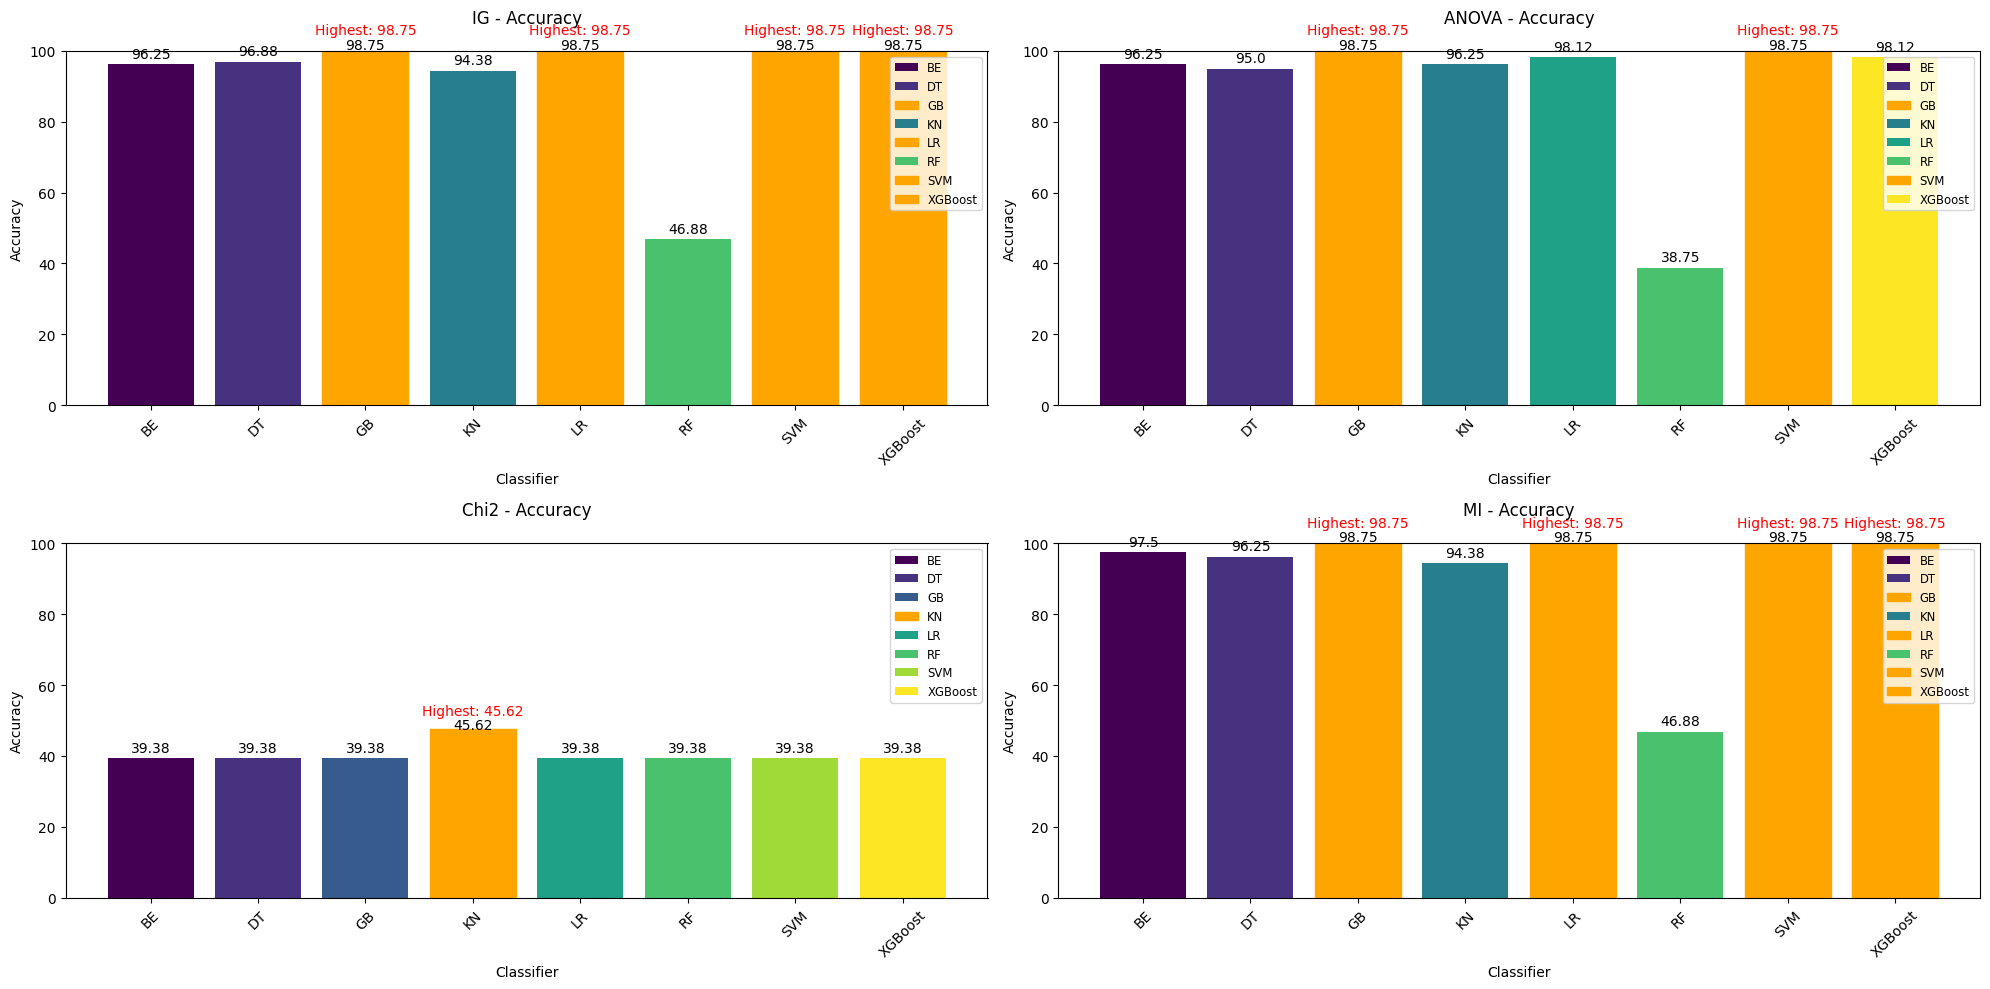

In [155]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create bar graphs for each feature selection method
def plot_performance(results, metric='Accuracy', classifier_names=None):
    methods = results.index.get_level_values(0).unique()
    if classifier_names is None:
        classifier_names = [f'Classifier {i+1}' for i in range(len(results.index.get_level_values(1).unique()))]

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
    axes = axes.flatten()

    # Generate distinct colors for the bars
    num_classifiers = len(classifier_names)
    colors = cm.get_cmap('viridis', num_classifiers)

    for idx, method in enumerate(methods):
        ax = axes[idx]
        method_results = results.loc[method]
        metric_values = method_results[metric].tolist()

        # Create the bar plot with different colors and metric values displayed
        bars = ax.bar(classifier_names, metric_values, color=[colors(i) for i in range(num_classifiers)])
        ax.set_title(f'{method} - {metric}', pad=20)
        ax.set_ylim(0, 100)
        ax.set_ylabel(metric)
        ax.set_xlabel('Classifier')
        ax.tick_params(axis='x', rotation=45)

        # Add metric values on top of the bars
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

        # Highlight and label the highest values (multiple if there are ties)
        highest_value = max(metric_values)
        for i, val in enumerate(metric_values):
            if val == highest_value:
                bars[i].set_color('orange')
                bars[i].set_height(highest_value + 2)  # Increase height of highest value bar
                ax.text(bars[i].get_x() + bars[i].get_width()/2,
                        highest_value + 5,  # Adjust vertical position of label
                        f"Highest: {round(highest_value, 2)}",
                        ha='center', va='bottom', fontsize=10, color='red')

        # Add a legend to label the colors
        ax.legend(bars, classifier_names, loc='upper right', fontsize='small')

    plt.tight_layout()
    plt.show()

# Example usage
classifier_names = ["BE", "DT", "GB", "KN", "LR", "RF", "SVM", "XGBoost"]
plot_performance(results_df, metric='Accuracy', classifier_names=classifier_names)


<ipython-input-155-f2ed21a4e539>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', num_classifiers)


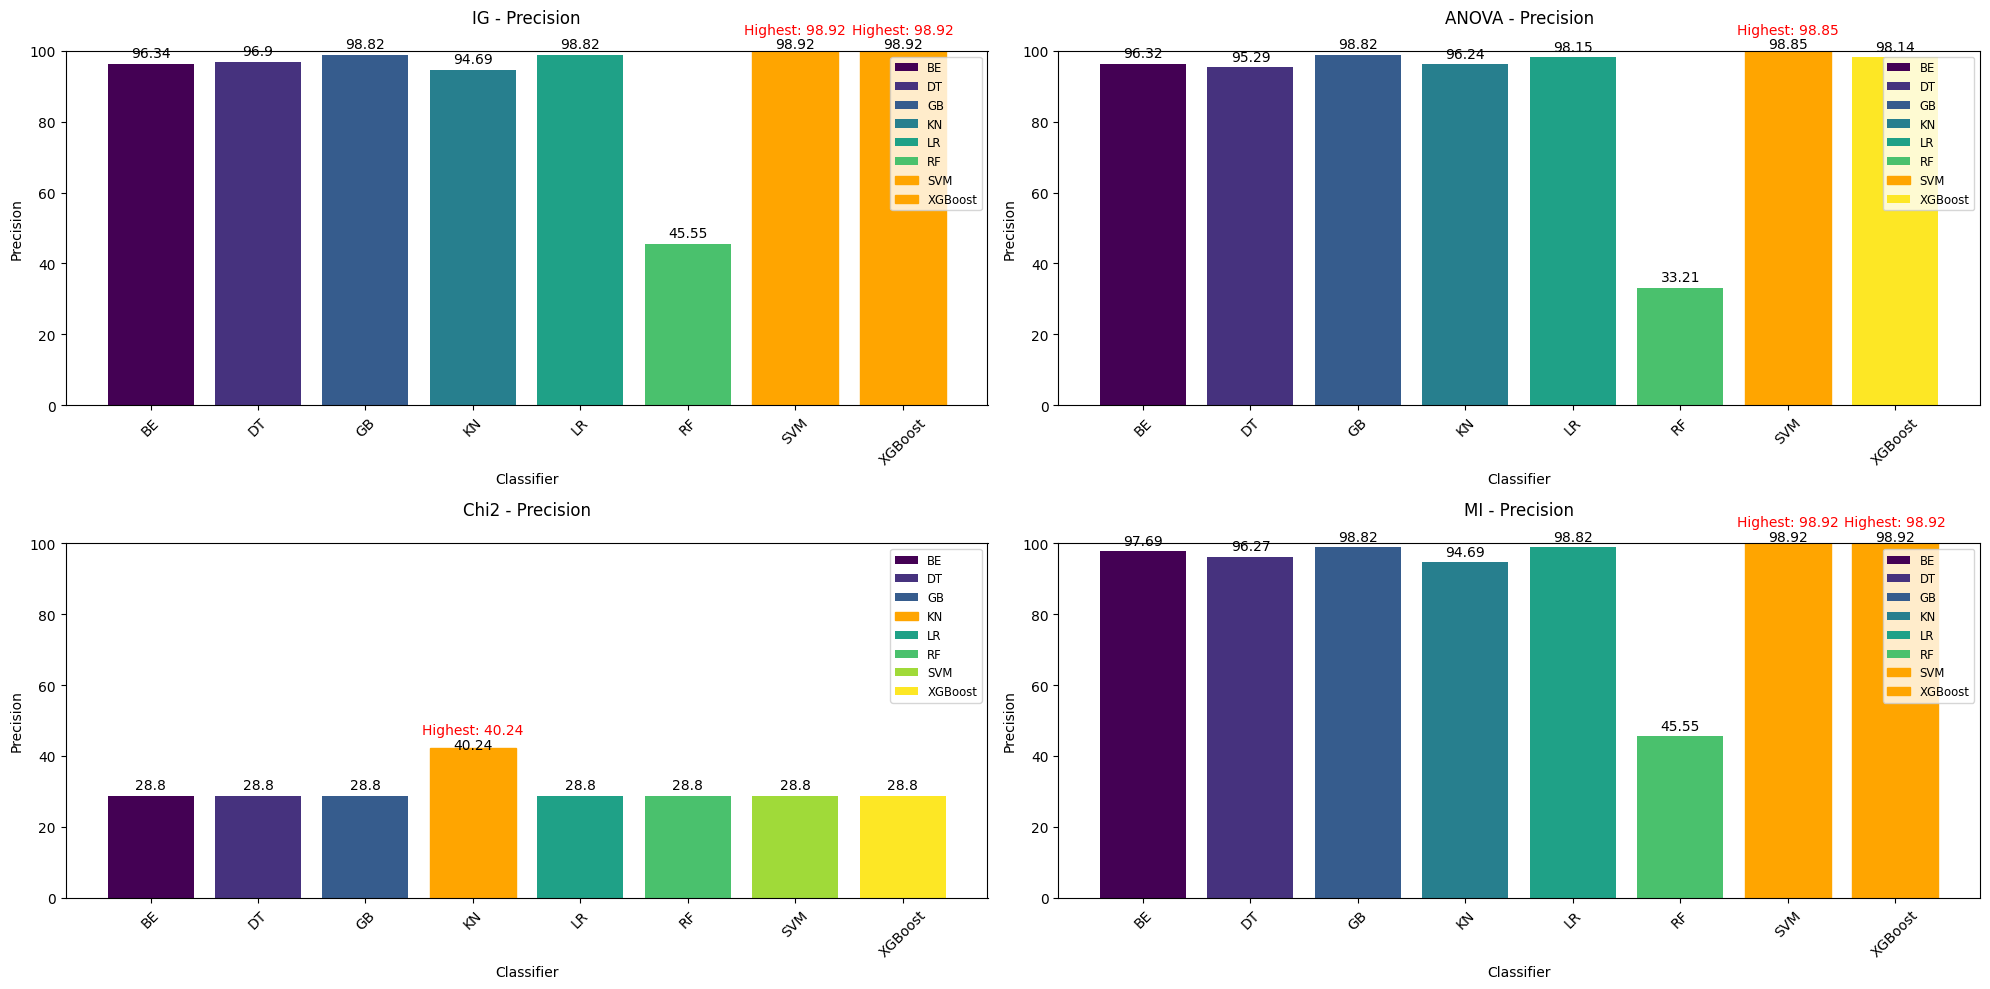

In [156]:
plot_performance(results_df, metric='Precision', classifier_names=classifier_names)

<ipython-input-155-f2ed21a4e539>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', num_classifiers)


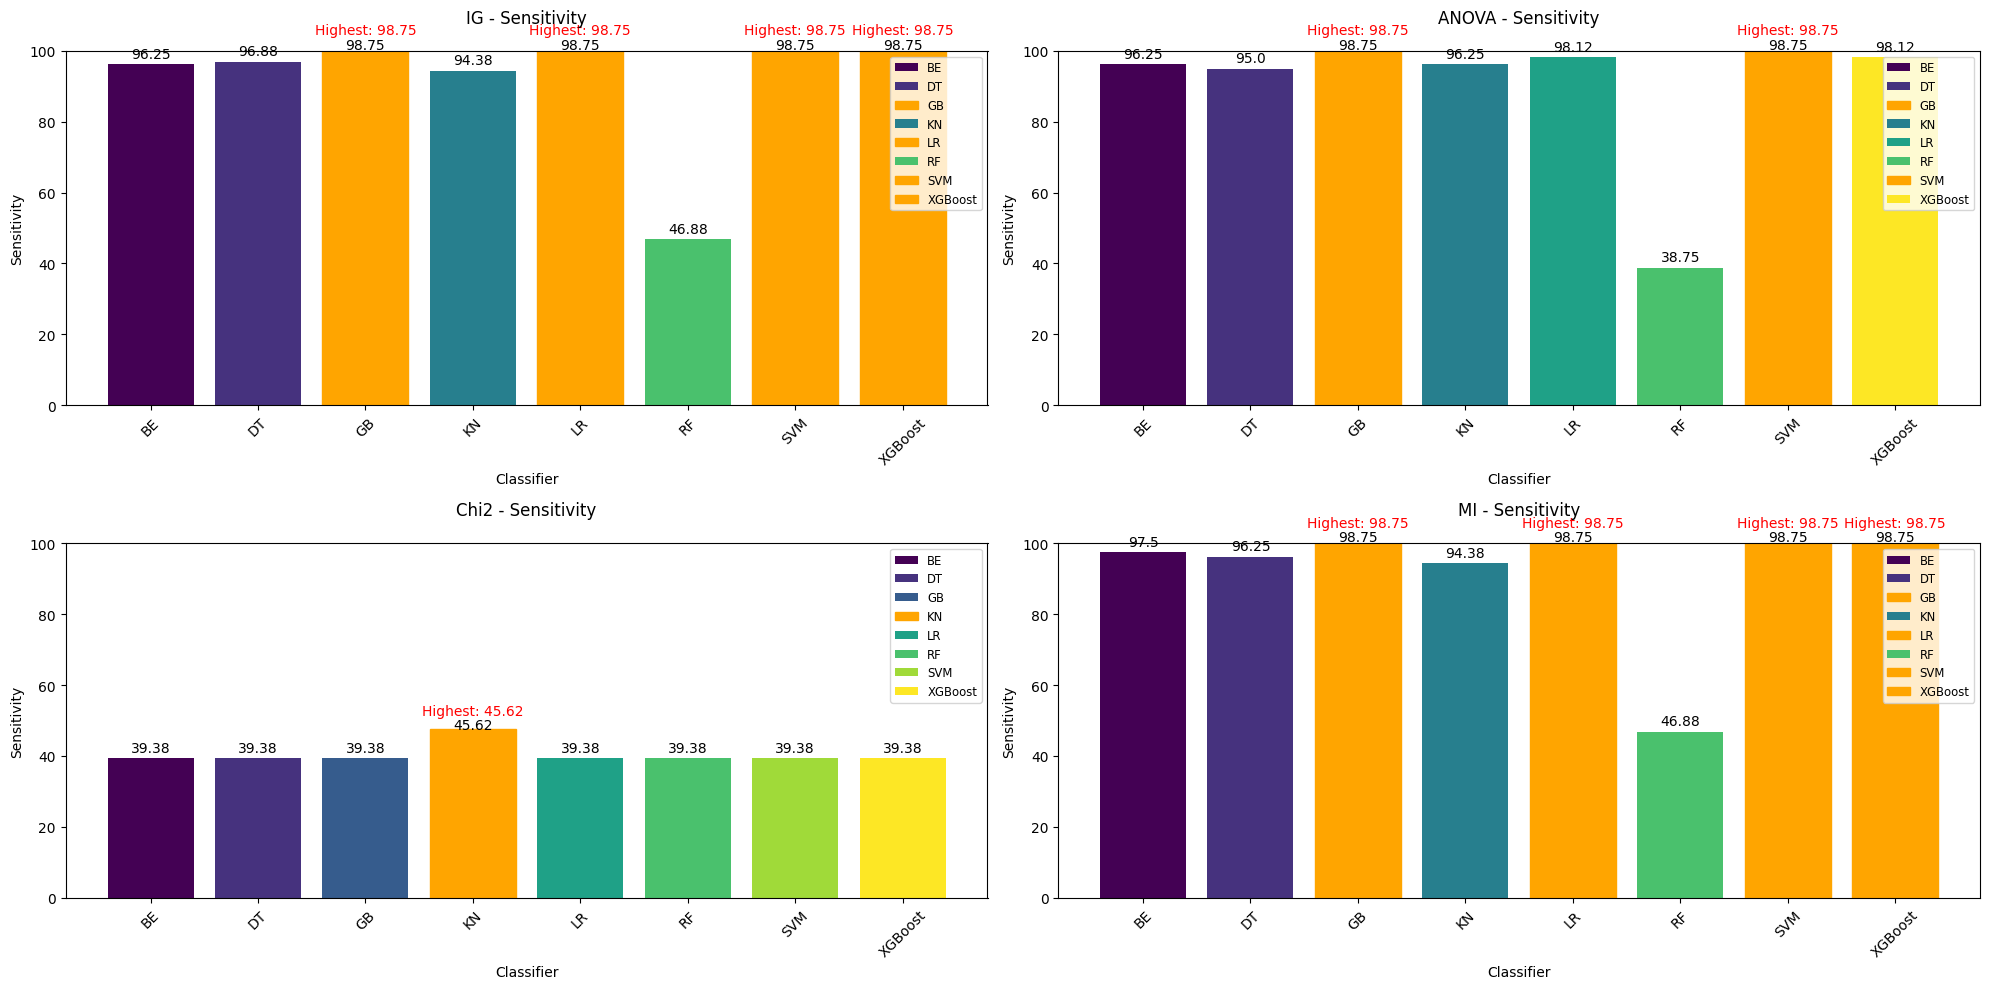

In [157]:

plot_performance(results_df, metric='Sensitivity', classifier_names=classifier_names)

<ipython-input-155-f2ed21a4e539>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', num_classifiers)


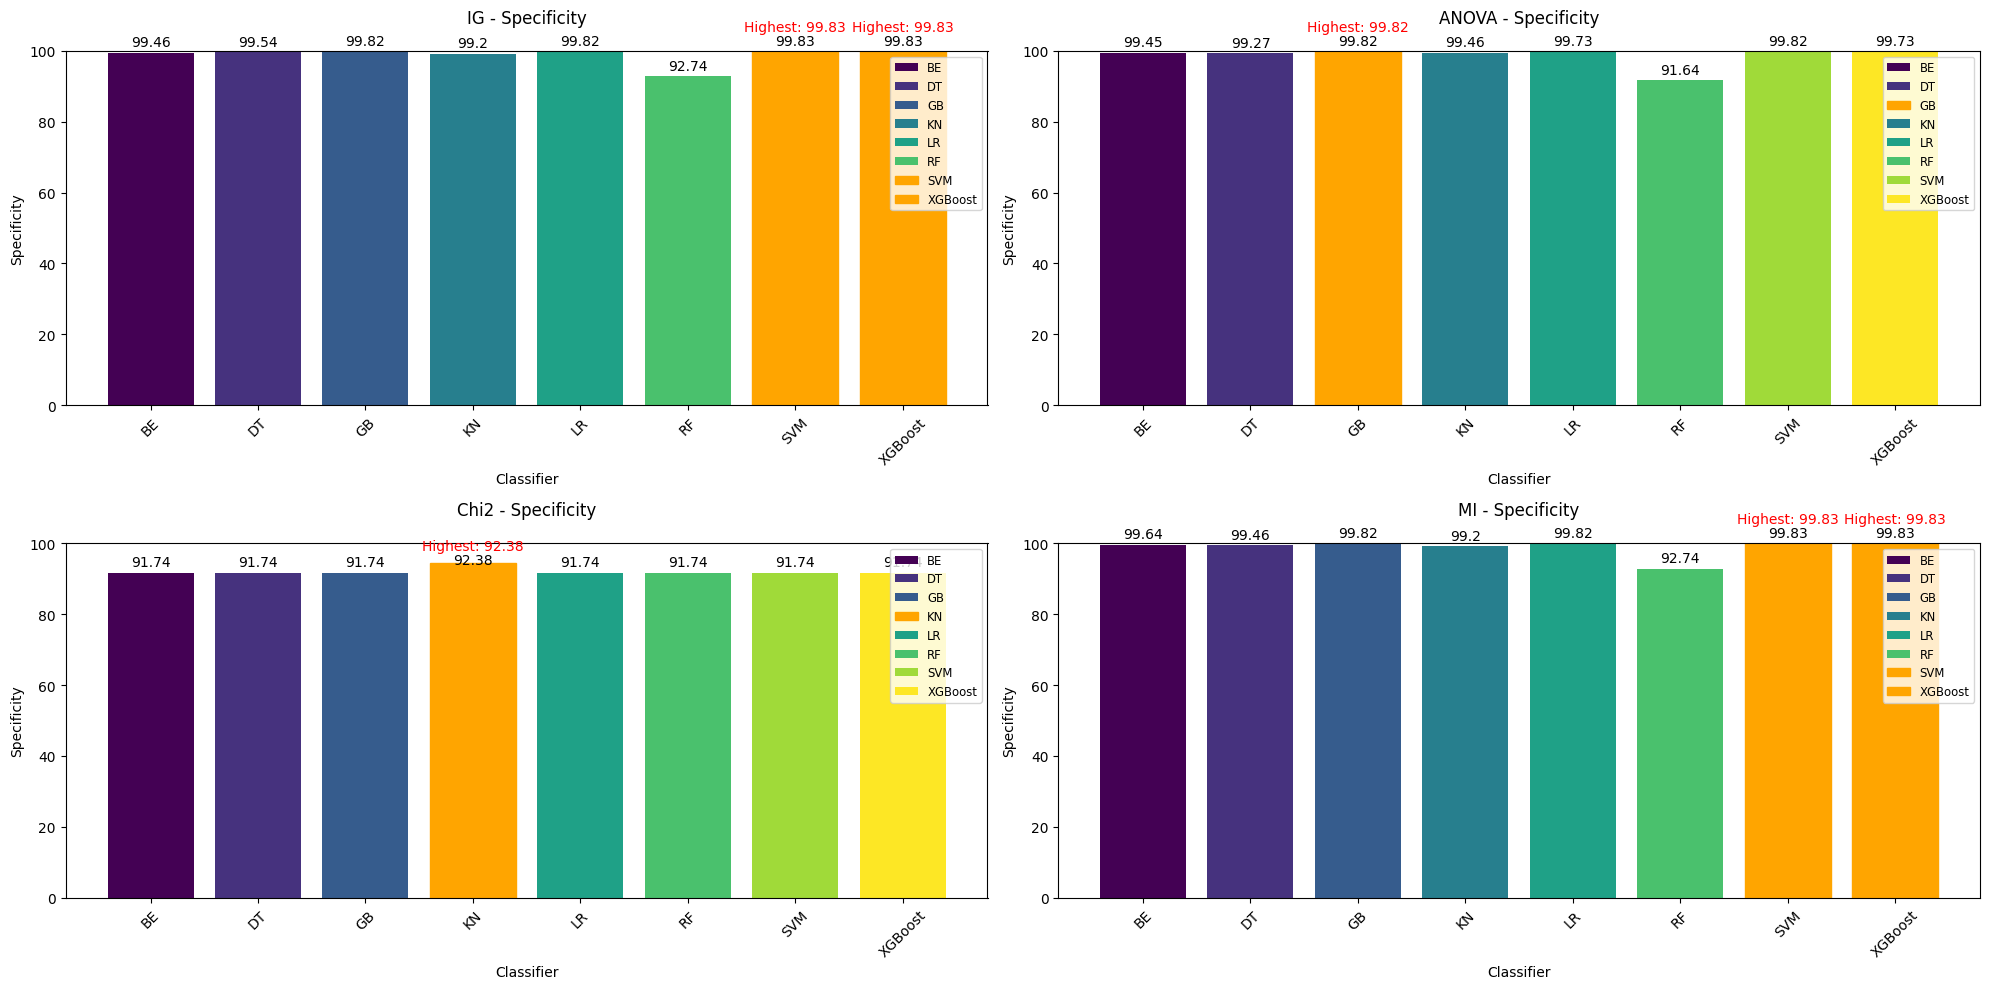

In [158]:
plot_performance(results_df, metric='Specificity', classifier_names=classifier_names)

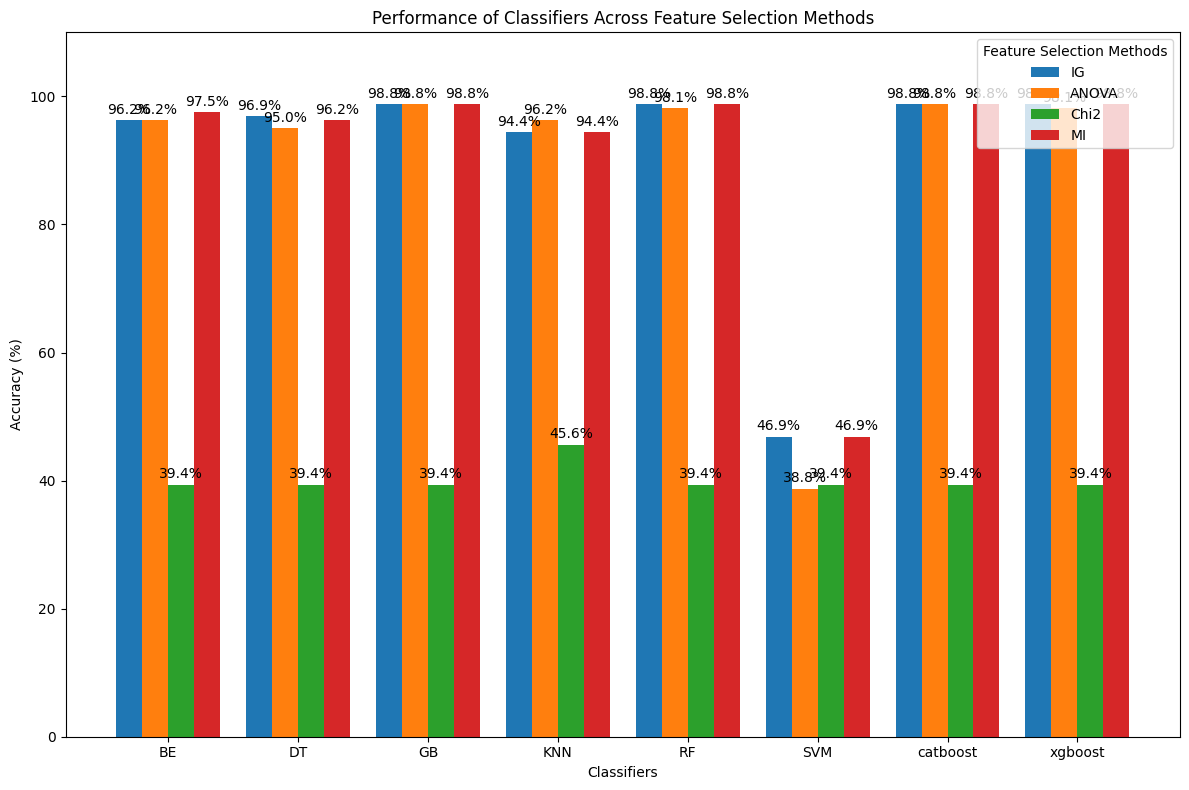

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
methods = ['IG', 'ANOVA', 'Chi2', 'MI']
classifiers = ['BE', 'DT', 'GB', 'KNN', 'RF', 'SVM', 'catboost', 'xgboost']

# Convert results to a list of accuracies for each method
def extract_accuracies(results_dict, classifiers): # Changed results_list to results_dict
    return [results_dict[clf]['Accuracy'] * 100 for clf in classifiers] # Accessing the dictionary using classifier names

# Extract the accuracy results for each feature selection method and multiply by 100
accuracy_results = {
    'IG': extract_accuracies(results_ig, classifiers), # Passing the dictionary directly
    'ANOVA': extract_accuracies(results_anova, classifiers),
    'Chi2': extract_accuracies(results_chi2, classifiers),
    'MI': extract_accuracies(results_mi, classifiers),
}
# Set up the bar width and x locations
bar_width = 0.2
x = np.arange(len(classifiers))

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each feature selection method
for i, method in enumerate(methods):
    ax.bar(x + i * bar_width, accuracy_results[method], width=bar_width, label=method)

# Add labels, title, and legend
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Performance of Classifiers Across Feature Selection Methods')
ax.set_xticks(x + (len(methods) - 1) * bar_width / 2)
ax.set_xticklabels(classifiers)
ax.set_ylim(0, 110)  # Adjust y-axis to accommodate percentage values
ax.legend(title='Feature Selection Methods')

# Add data labels
for i, method in enumerate(methods):
    for j, value in enumerate(accuracy_results[method]):
        ax.text(x[j] + i * bar_width, value + 1, f'{value:.1f}%', ha='center')

# Show the plot
plt.tight_layout()
plt.show()
